# MNIST Digit Classification

### Importing the libraries

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Sample images

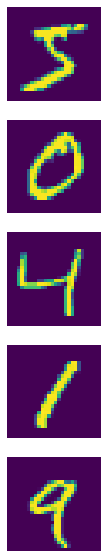

In [31]:
fig = plt.figure(figsize=(50, 10))

rows = 5
columns = 1

for i in range(5):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(X_train[i])
  plt.axis('off')


### Reshaping the data

In [32]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

### One hot encoding applied on the labels

In [33]:
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(60000, 10)
(10000, 10)


### Building the Convolutional Neural Network

In [22]:
model = Sequential()
# Convolution
model.add(Conv2D(32, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
# Pooling
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
# Adding second convolutional layer
model.add(Conv2D(64, kernel_size=3, activation='relu'))
# Pooling
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
# Flattening
model.add(Flatten())
# Full connection
model.add(Dense(units=128,activation='relu'))
#Output layer
model.add(Dense(units=10,activation='sigmoid'))

### Compiling the CNN

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the model

In [24]:
hist = model.fit(X_train,y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.2788 - accuracy: 0.9538 - val_loss: 0.0596 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0592 - accuracy: 0.9826 - val_loss: 0.0497 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0481 - accuracy: 0.9858 - val_loss: 0.0533 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0390 - accuracy: 0.9882 - val_loss: 0.0630 - val_accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.0641 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0469 - val_accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0246 - accuracy: 0.9927 - val_loss: 0.0651 -